# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 + 3*4

22

In [8]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [10]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [11]:
X_test.shape

(1724, 2500)

In [12]:
prob_token_spam.shape

(2500,)

In [13]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [14]:
PROB_SPAM = 0.3116

* We will take log for easier calculation and for better visualization

In [15]:
np.log(prob_token_spam)

array([ -4.40750247,  -5.25357728,  -4.98997971, ..., -11.40097663,
       -12.09412381,  -8.83602727])

## Joint probability in log format

In [16]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [17]:
joint_log_spam[:5]

array([24.27580867,  2.15999942, 20.59075715, 17.74776262, 20.50984493])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [18]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [19]:
joint_log_ham[:5]

array([-60.96824846, -11.00905316, -37.9678354 , -59.13066195,
       -53.80247296])

In [20]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [21]:
prediction = joint_log_spam > joint_log_ham

In [22]:
prediction[-5:]

array([ True, False, False, False, False])

In [23]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [24]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [26]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [27]:
# Accuracy
correct_docs/len(X_test)

0.9773781902552204

In [28]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the Results

In [30]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

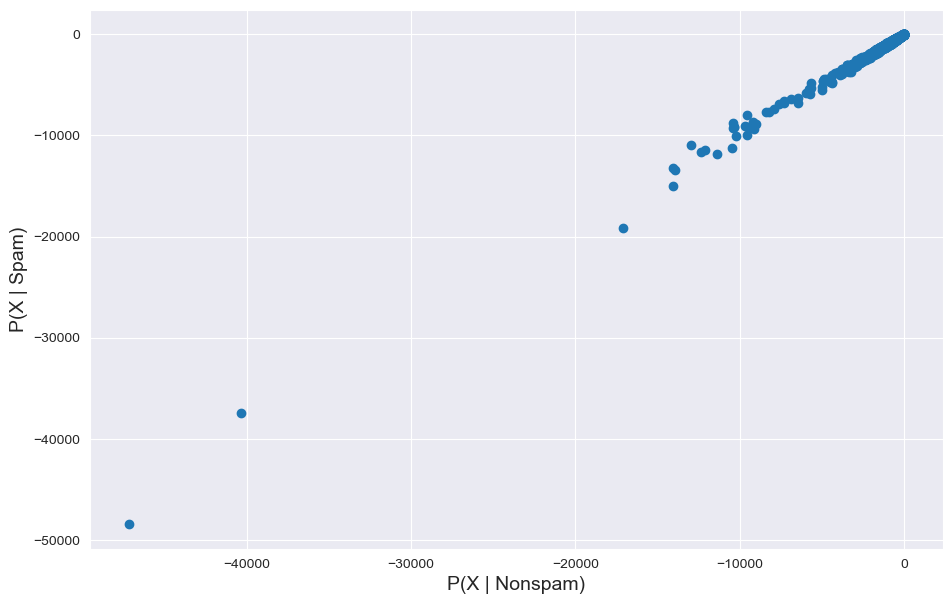

In [31]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

In [29]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

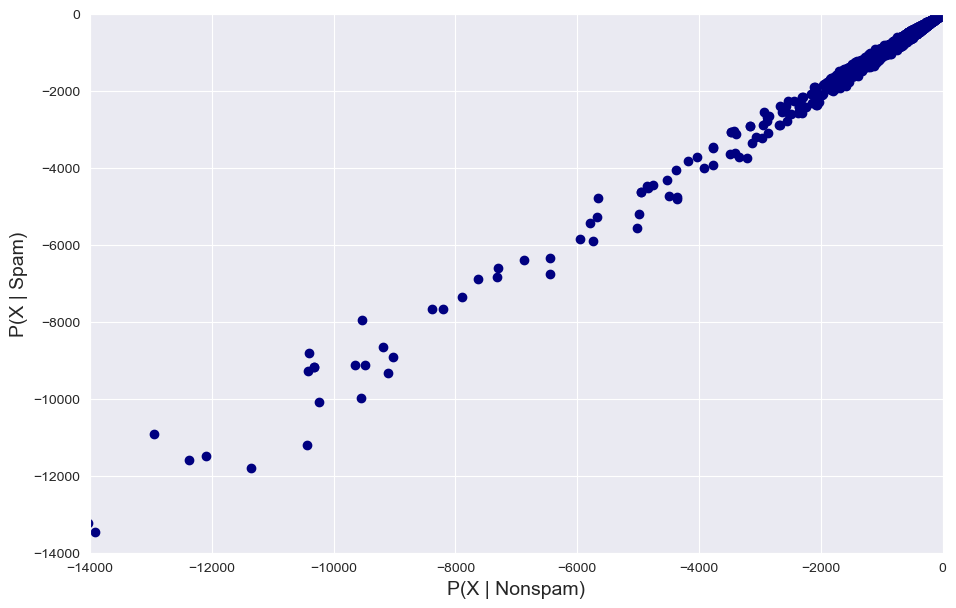

In [32]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

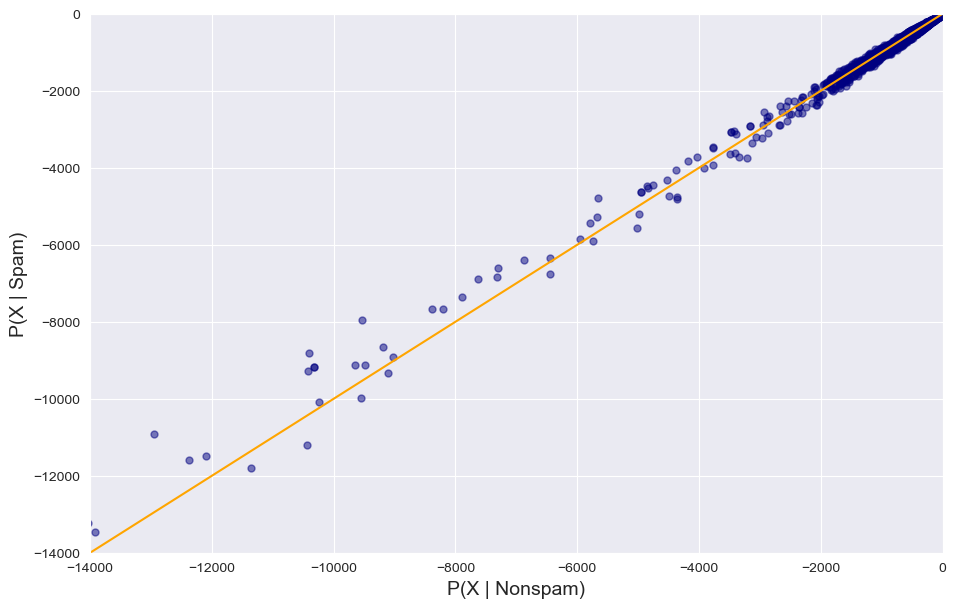

In [33]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

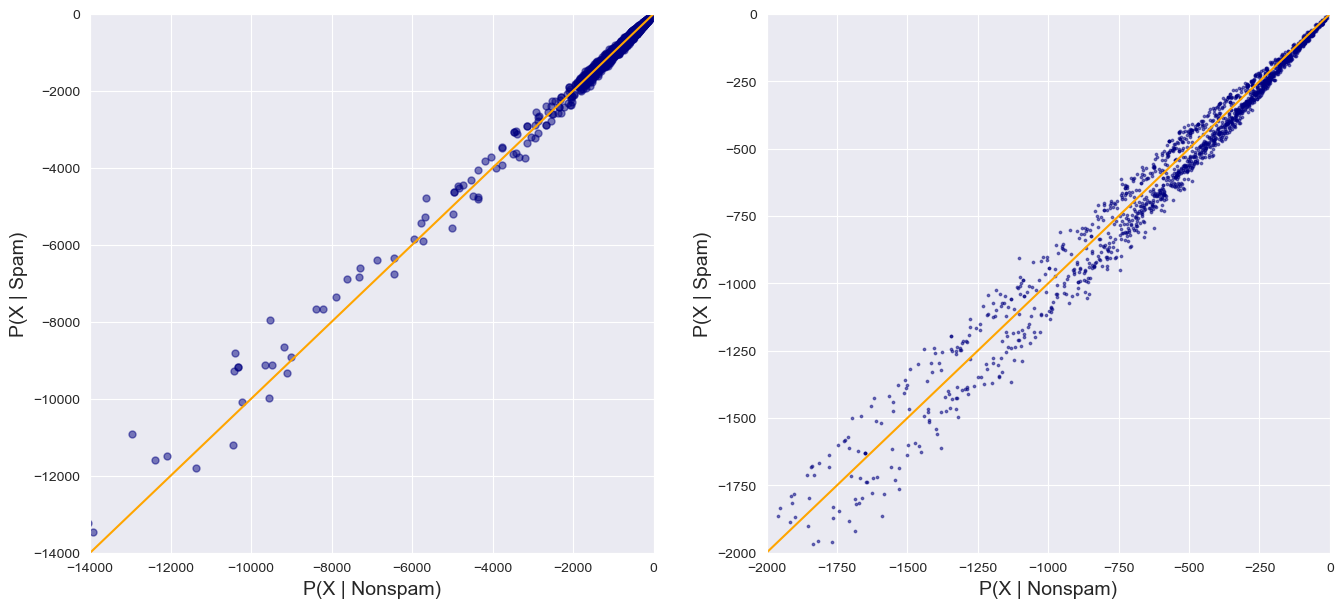

In [34]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [36]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

In [37]:
summary_df

,P(X | Spam),P(X | Nonspam),Actual Category
0,-1220.358942,-1305.603000,1.0
1,-262.915612,-276.084665,1.0
2,-411.408785,-469.967378,1.0
3,-1473.134114,-1550.012539,1.0
4,-1240.033216,-1314.345534,1.0
...,...,...,...
1719,-1997.332671,-2109.295613,0.0
1720,-875.877756,-787.159584,0.0
1721,-4803.147897,-4367.488439,0.0
1722,-200.681367,-190.837535,0.0


C:\Users\gujja\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


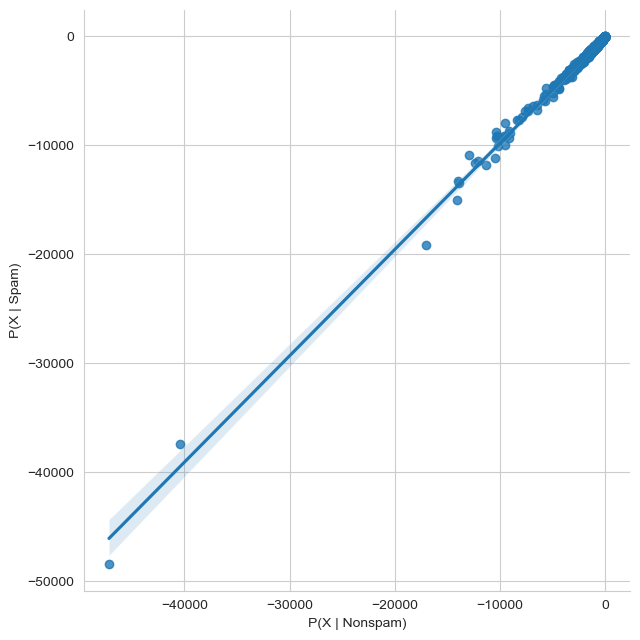

In [39]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5)

plt.show()

C:\Users\gujja\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


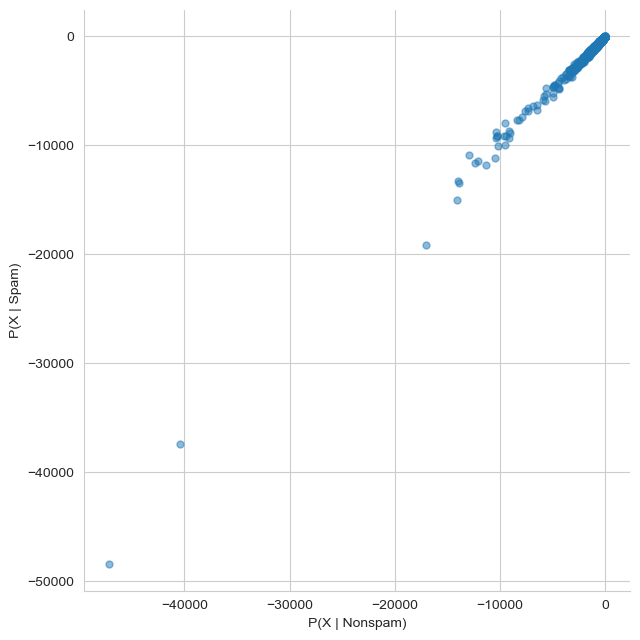

In [40]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
           scatter_kws={'alpha': 0.5, 's': 25})
plt.show()

C:\Users\gujja\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


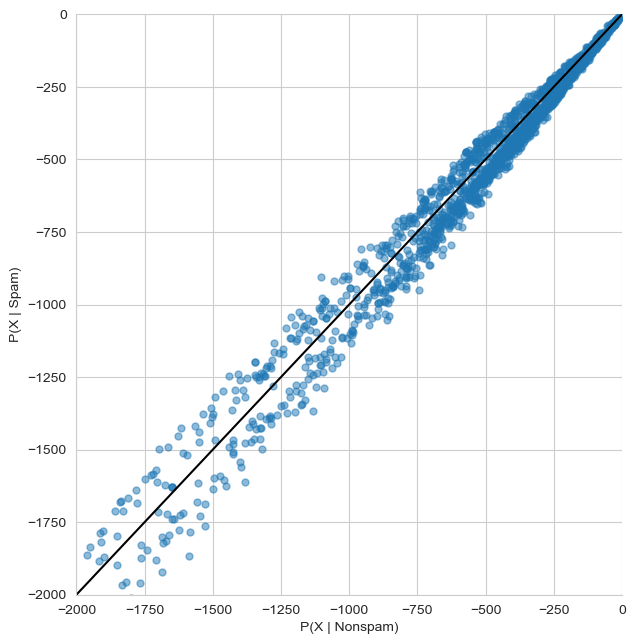

In [43]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

C:\Users\gujja\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


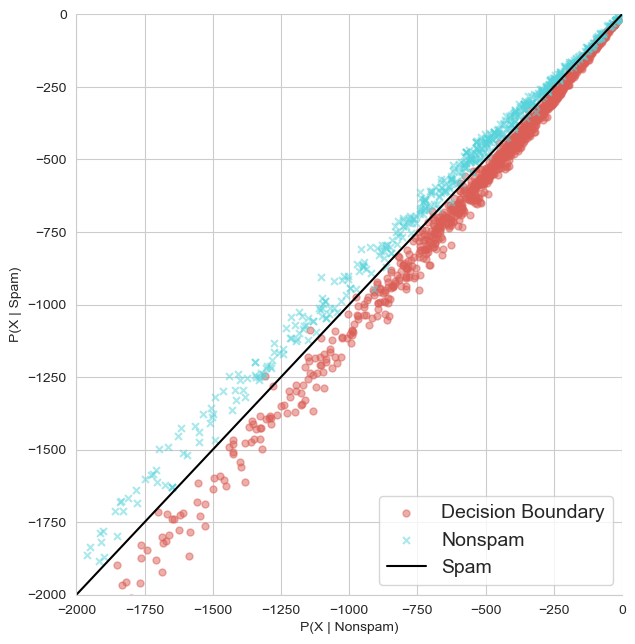

In [45]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

C:\Users\gujja\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


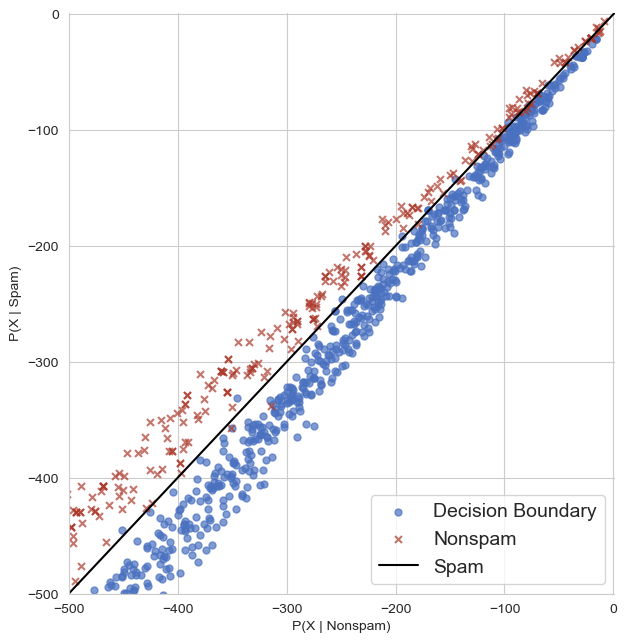

In [47]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

* Spam = false = 1163
* Non-Spam = true = 560

In [48]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [49]:
true_pos = (y_test == 1) & (prediction == 1)

In [50]:
true_pos.sum()

569

In [51]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [52]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

In [53]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.60%


## Precision Score

In [55]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


## F-Score or F1 Score

In [56]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
